# Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных и начальная обработка

In [44]:
train_df=pd.read_csv('train.csv')
print('shape: ',train_df.shape)
train_df

shape:  (18524, 9)


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [18]:
train_df['Stage_fear'].value_counts()

Stage_fear
No     12609
Yes     4022
Name: count, dtype: int64

In [19]:
train_df['Drained_after_socializing'].value_counts()

Drained_after_socializing
No     13313
Yes     4062
Name: count, dtype: int64

In [30]:
train_df['Personality'].value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

In [45]:
train_df[['Stage_fear','Drained_after_socializing']]=train_df[['Stage_fear','Drained_after_socializing']].replace({'Yes':True,"No":False})
train_df=train_df.set_index('id')
train_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,False,6.0,4.0,False,15.0,5.0,Extrovert
1,1.0,False,7.0,3.0,False,10.0,8.0,Extrovert
2,6.0,True,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,False,7.0,3.0,False,11.0,5.0,Extrovert
4,1.0,False,4.0,4.0,False,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,False,7.0,3.0,False,9.0,7.0,Extrovert
18520,1.0,NaN,6.0,7.0,False,6.0,5.0,Extrovert
18521,7.0,True,1.0,1.0,True,1.0,NaN,Introvert


# Анализ данных

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [37]:
train_df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Social_event_attendance'}>,
        <Axes: title={'center': 'Going_outside'}>],
       [<Axes: title={'center': 'Friends_circle_size'}>,
        <Axes: title={'center': 'Post_frequency'}>, <Axes: >]],
      dtype=object)

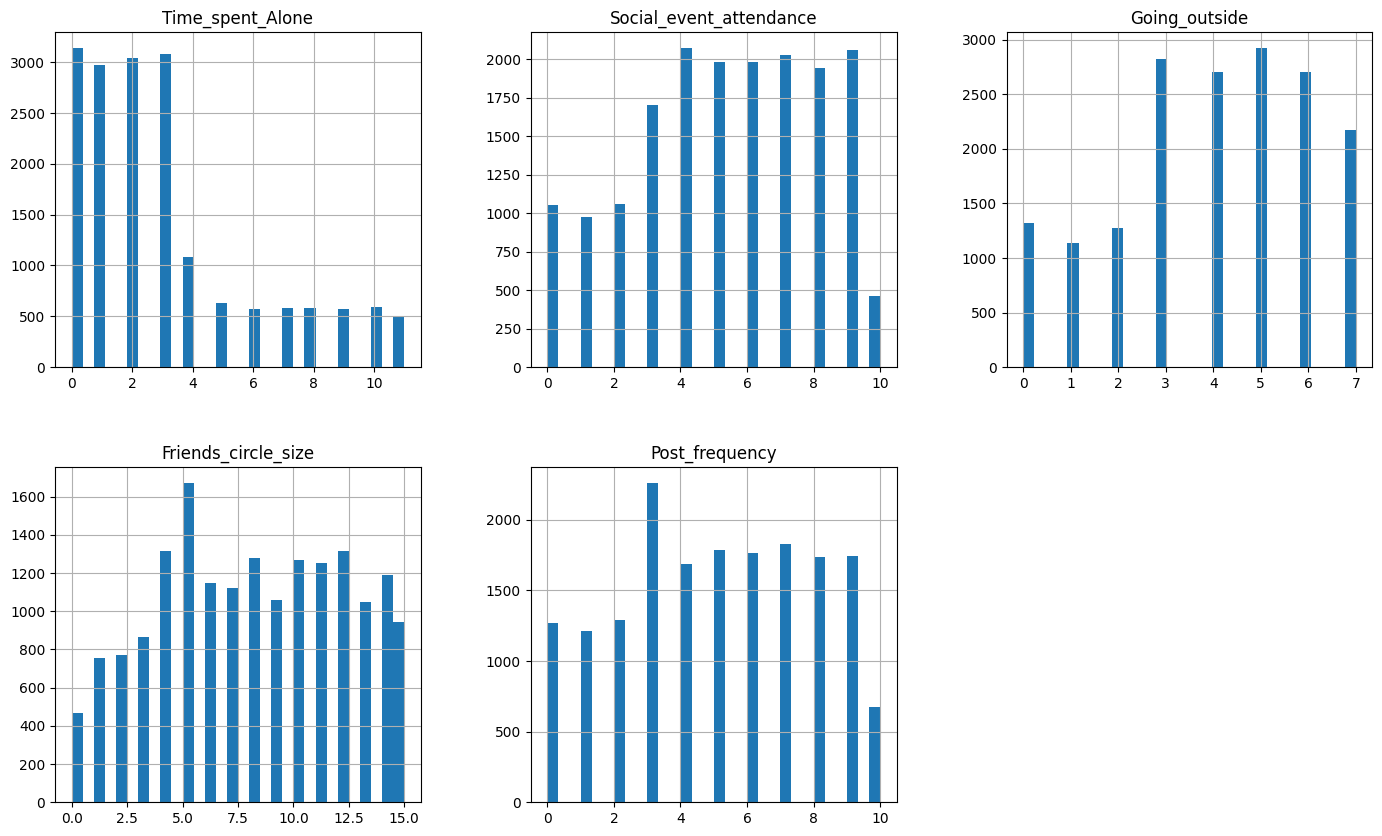

In [51]:
train_df.hist(figsize=(17,10),layout=(2,3),bins=30)